In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

In [2]:
df = pd.read_csv('Resources/sales.csv')
df.head()

,Date,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year,promotion
0,2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5,1
1,2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6,1
2,2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7,1
3,2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8,1
4,2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9,0


In [3]:
df=df.drop(columns=['Date', 'year', 'day', 'month','weekly_sales'])
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,week_of_year,promotion
0,1,1,False,9.99,7.99,245,5,1
1,1,1,True,9.99,7.99,453,6,1
2,1,1,False,9.99,7.99,409,7,1
3,1,1,False,9.99,7.99,191,8,1
4,1,1,False,9.99,9.99,145,9,0


In [4]:
df=df[['Store','Product','week_of_year','Base Price','Price','promotion','Is_Holiday','Weekly_Units_Sold']]
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,1,1,5,9.99,7.99,1,False,245
1,1,1,6,9.99,7.99,1,True,453
2,1,1,7,9.99,7.99,1,False,409
3,1,1,8,9.99,7.99,1,False,191
4,1,1,9,9.99,9.99,0,False,145


In [5]:
df['Temp']='_'
df['Store'] = df['Temp'].str.cat(df['Store'].values.astype(str))
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold,Temp
0,_1,1,5,9.99,7.99,1,False,245,_
1,_1,1,6,9.99,7.99,1,True,453,_
2,_1,1,7,9.99,7.99,1,False,409,_
3,_1,1,8,9.99,7.99,1,False,191,_
4,_1,1,9,9.99,9.99,0,False,145,_


In [6]:
del df['Temp']
df

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,1,5,9.99,7.99,1,False,245
1,_1,1,6,9.99,7.99,1,True,453
2,_1,1,7,9.99,7.99,1,False,409
3,_1,1,8,9.99,7.99,1,False,191
4,_1,1,9,9.99,9.99,0,False,145
...,...,...,...,...,...,...,...,...
3856,_10,3,39,19.99,19.99,0,False,133
3857,_10,3,40,19.99,19.99,0,False,133
3858,_10,3,41,19.99,19.99,0,False,127
3859,_10,3,42,19.99,19.99,0,False,133


In [7]:
df['Temp']='_'
df['Product'] = df['Temp'].str.cat(df['Product'].values.astype(str))
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold,Temp
0,_1,_1,5,9.99,7.99,1,False,245,_
1,_1,_1,6,9.99,7.99,1,True,453,_
2,_1,_1,7,9.99,7.99,1,False,409,_
3,_1,_1,8,9.99,7.99,1,False,191,_
4,_1,_1,9,9.99,9.99,0,False,145,_


In [8]:
del df['Temp']
df

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,5,9.99,7.99,1,False,245
1,_1,_1,6,9.99,7.99,1,True,453
2,_1,_1,7,9.99,7.99,1,False,409
3,_1,_1,8,9.99,7.99,1,False,191
4,_1,_1,9,9.99,9.99,0,False,145
...,...,...,...,...,...,...,...,...
3856,_10,_3,39,19.99,19.99,0,False,133
3857,_10,_3,40,19.99,19.99,0,False,133
3858,_10,_3,41,19.99,19.99,0,False,127
3859,_10,_3,42,19.99,19.99,0,False,133


In [9]:
df['Temp']='_'
df['week_of_year'] = df['Temp'].str.cat(df['week_of_year'].values.astype(str))
del df['Temp']
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,False,245
1,_1,_1,_6,9.99,7.99,1,True,453
2,_1,_1,_7,9.99,7.99,1,False,409
3,_1,_1,_8,9.99,7.99,1,False,191
4,_1,_1,_9,9.99,9.99,0,False,145


In [10]:
#  LabelEncoding Is_Holiday column
df['Is_Holiday']=LabelEncoder().fit_transform(df['Is_Holiday'])
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,0,245
1,_1,_1,_6,9.99,7.99,1,1,453
2,_1,_1,_7,9.99,7.99,1,0,409
3,_1,_1,_8,9.99,7.99,1,0,191
4,_1,_1,_9,9.99,9.99,0,0,145


In [11]:
df.to_csv("Resources/preprocessed.csv")

In [12]:
sc1=df[df['Product']=='_1']
sc2=df[df['Product']=='_2']
sc3=df[df['Product']=='_3']

In [13]:
# Create features
X=sc3.drop(columns=['Weekly_Units_Sold'], axis = 1)

X=pd.get_dummies(X)

# Create target. 
y = sc3['Weekly_Units_Sold']

In [14]:
X

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
286,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
287,19.99,19.99,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
288,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
289,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
290,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3858,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3859,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X.describe()

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,...,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,20.717273,19.117413,0.153846,0.069930,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.013986,0.013986,0.020979,0.013986,0.013986,0.013986,0.020979,0.020979,0.020979,0.020979
std,0.962465,3.822572,0.360941,0.255128,0.314392,0.314392,0.314392,0.314392,0.314392,0.314392,...,0.117478,0.117478,0.143370,0.117478,0.117478,0.117478,0.143370,0.143370,0.143370,0.143370
min,19.990000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,19.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.990000,19.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.990000,21.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.990000,21.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Create and train the model
model = LinearRegression().fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [18]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.634184338283972
Testing Score: 0.4467700757692613
---------------------
R2 Score: 0.4467700757692613


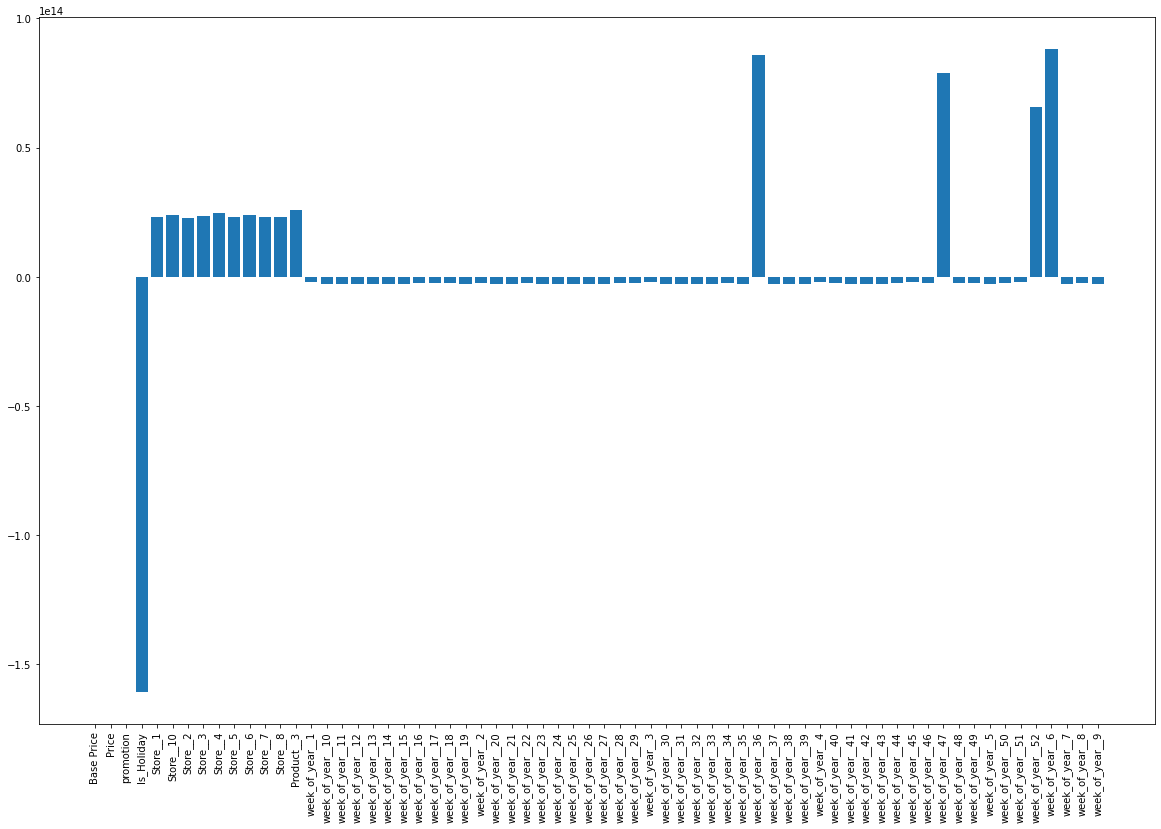

In [19]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_,)
plt.show()

## Lasso Regression 

In [20]:
# Create and train the model
model = Lasso(max_iter=10000).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [21]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6285707950065008
Testing Score: 0.47396446151470073
---------------------
R2 Score: 0.47396446151470073


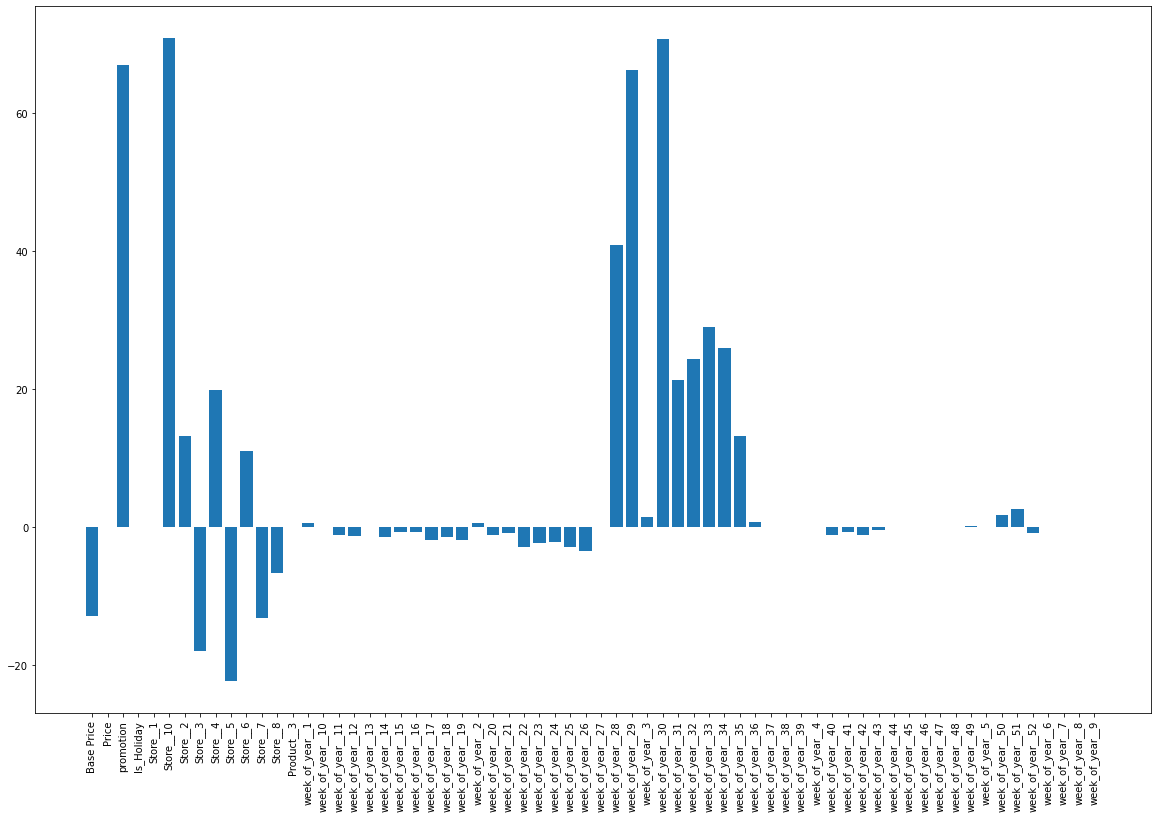

In [22]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## Ridge

In [23]:
# Create and train the model
model = Ridge(alpha=100).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [24]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6255202086981163
Testing Score: 0.5064363144775739
---------------------
R2 Score: 0.5064363144775739


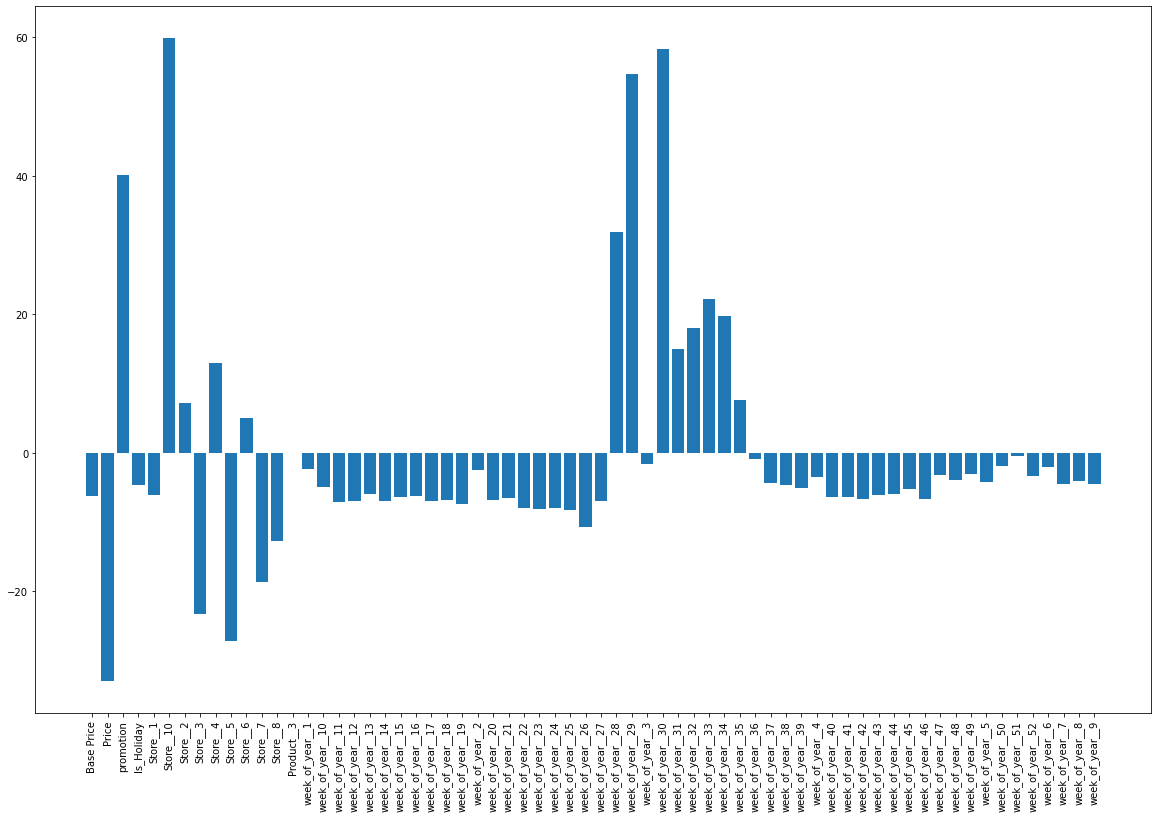

In [25]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## ElasticNet

In [26]:
# Create and train the model
model = ElasticNet(alpha=10).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [27]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.25886454807199055
Testing Score: 0.3141372241641497
---------------------
R2 Score: 0.3141372241641497


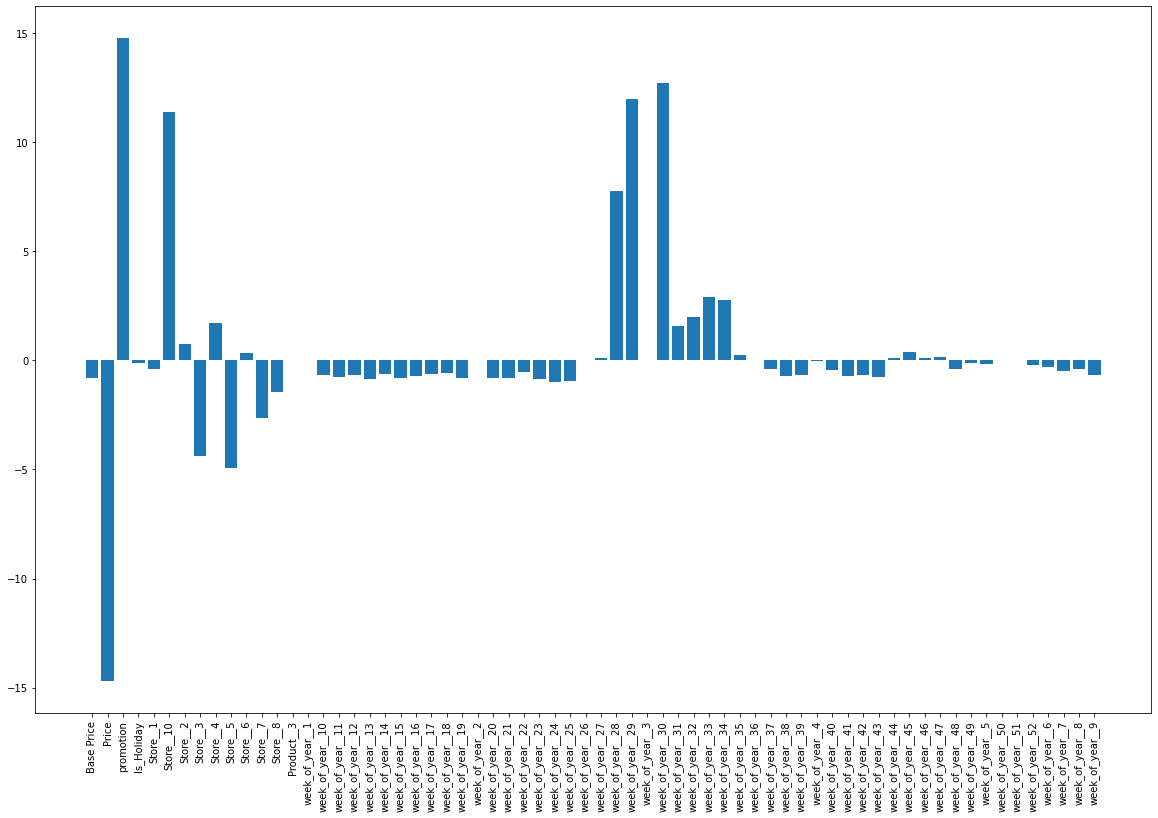

In [28]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.634184338283972
0.4467700757692613
66.3830223942914
0.4467700757692613


In [31]:
# !pip install lightgbm --quiet

## LGBM Regressor

In [32]:
from lightgbm import LGBMRegressor

In [33]:
model=LGBMRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6615609028193197
0.671462341501261
48.16415621360376
0.671462341501261


## XGBoost Regressor

In [34]:
from xgboost.sklearn import XGBRegressor

In [35]:
model=XGBRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.9914275934018283
0.8120795608309641
21.80832105356714
0.8120795608309641


## CatBoost Regressor

In [36]:
# !pip install catboost --quiet

In [37]:
from catboost import CatBoostRegressor

In [38]:
model= CatBoostRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

Learning rate set to 0.040713
0:	learn: 224.4246907	total: 149ms	remaining: 2m 28s
1:	learn: 220.1944811	total: 151ms	remaining: 1m 15s
2:	learn: 215.9305101	total: 153ms	remaining: 50.8s
3:	learn: 212.0743624	total: 154ms	remaining: 38.4s
4:	learn: 208.1082016	total: 156ms	remaining: 31s
5:	learn: 204.4991587	total: 158ms	remaining: 26.1s
6:	learn: 201.0655829	total: 159ms	remaining: 22.6s
7:	learn: 197.7025119	total: 161ms	remaining: 19.9s
8:	learn: 194.8144720	total: 163ms	remaining: 17.9s
9:	learn: 191.5372718	total: 164ms	remaining: 16.3s
10:	learn: 188.6760391	total: 166ms	remaining: 14.9s
11:	learn: 185.6746799	total: 167ms	remaining: 13.8s
12:	learn: 182.8723215	total: 169ms	remaining: 12.8s
13:	learn: 180.1311295	total: 170ms	remaining: 12s
14:	learn: 177.4550291	total: 172ms	remaining: 11.3s
15:	learn: 175.1776718	total: 174ms	remaining: 10.7s
16:	learn: 172.4616970	total: 175ms	remaining: 10.1s
17:	learn: 170.0657690	total: 177ms	remaining: 9.66s
18:	learn: 168.0416277	total

183:	learn: 54.2342962	total: 465ms	remaining: 2.06s
184:	learn: 54.0645442	total: 467ms	remaining: 2.06s
185:	learn: 53.8154528	total: 468ms	remaining: 2.05s
186:	learn: 53.5627939	total: 470ms	remaining: 2.04s
187:	learn: 53.3901247	total: 471ms	remaining: 2.03s
188:	learn: 53.0990048	total: 473ms	remaining: 2.03s
189:	learn: 52.9042458	total: 474ms	remaining: 2.02s
190:	learn: 52.7450973	total: 476ms	remaining: 2.01s
191:	learn: 52.5699198	total: 477ms	remaining: 2.01s
192:	learn: 52.2932300	total: 478ms	remaining: 2s
193:	learn: 52.1333571	total: 480ms	remaining: 1.99s
194:	learn: 51.9440925	total: 481ms	remaining: 1.99s
195:	learn: 51.7532661	total: 482ms	remaining: 1.98s
196:	learn: 51.5343193	total: 483ms	remaining: 1.97s
197:	learn: 51.2860982	total: 485ms	remaining: 1.96s
198:	learn: 51.0889381	total: 486ms	remaining: 1.96s
199:	learn: 50.9303761	total: 488ms	remaining: 1.95s
200:	learn: 50.7815511	total: 489ms	remaining: 1.95s
201:	learn: 50.5852053	total: 491ms	remaining: 1.

360:	learn: 35.7576508	total: 760ms	remaining: 1.34s
361:	learn: 35.7293142	total: 761ms	remaining: 1.34s
362:	learn: 35.6883875	total: 762ms	remaining: 1.34s
363:	learn: 35.6415744	total: 764ms	remaining: 1.33s
364:	learn: 35.5963969	total: 765ms	remaining: 1.33s
365:	learn: 35.5603107	total: 766ms	remaining: 1.33s
366:	learn: 35.5208274	total: 767ms	remaining: 1.32s
367:	learn: 35.4907644	total: 768ms	remaining: 1.32s
368:	learn: 35.4649451	total: 770ms	remaining: 1.32s
369:	learn: 35.4075229	total: 772ms	remaining: 1.31s
370:	learn: 35.3490191	total: 773ms	remaining: 1.31s
371:	learn: 35.3152281	total: 775ms	remaining: 1.31s
372:	learn: 35.2655134	total: 777ms	remaining: 1.3s
373:	learn: 35.2410191	total: 778ms	remaining: 1.3s
374:	learn: 35.2086679	total: 780ms	remaining: 1.3s
375:	learn: 35.1708541	total: 782ms	remaining: 1.3s
376:	learn: 35.1336481	total: 783ms	remaining: 1.29s
377:	learn: 35.0939260	total: 784ms	remaining: 1.29s
378:	learn: 35.0495478	total: 785ms	remaining: 1.2

533:	learn: 30.6186541	total: 1.05s	remaining: 919ms
534:	learn: 30.5899867	total: 1.05s	remaining: 917ms
535:	learn: 30.5582374	total: 1.06s	remaining: 914ms
536:	learn: 30.5347374	total: 1.06s	remaining: 912ms
537:	learn: 30.5236675	total: 1.06s	remaining: 910ms
538:	learn: 30.5100303	total: 1.06s	remaining: 908ms
539:	learn: 30.4938464	total: 1.06s	remaining: 905ms
540:	learn: 30.4702926	total: 1.06s	remaining: 903ms
541:	learn: 30.4555116	total: 1.06s	remaining: 900ms
542:	learn: 30.4372474	total: 1.07s	remaining: 898ms
543:	learn: 30.4134086	total: 1.07s	remaining: 896ms
544:	learn: 30.3830861	total: 1.07s	remaining: 894ms
545:	learn: 30.3622583	total: 1.07s	remaining: 892ms
546:	learn: 30.3492139	total: 1.07s	remaining: 890ms
547:	learn: 30.3317273	total: 1.07s	remaining: 887ms
548:	learn: 30.3199538	total: 1.08s	remaining: 885ms
549:	learn: 30.2890279	total: 1.08s	remaining: 883ms
550:	learn: 30.2692955	total: 1.08s	remaining: 881ms
551:	learn: 30.2612537	total: 1.08s	remaining:

708:	learn: 27.7125402	total: 1.35s	remaining: 553ms
709:	learn: 27.6982605	total: 1.35s	remaining: 551ms
710:	learn: 27.6865422	total: 1.35s	remaining: 549ms
711:	learn: 27.6784399	total: 1.35s	remaining: 547ms
712:	learn: 27.6575249	total: 1.35s	remaining: 545ms
713:	learn: 27.6486793	total: 1.35s	remaining: 543ms
714:	learn: 27.6288036	total: 1.36s	remaining: 541ms
715:	learn: 27.6073054	total: 1.36s	remaining: 539ms
716:	learn: 27.5872409	total: 1.36s	remaining: 537ms
717:	learn: 27.5769121	total: 1.36s	remaining: 534ms
718:	learn: 27.5655625	total: 1.36s	remaining: 532ms
719:	learn: 27.5571564	total: 1.36s	remaining: 531ms
720:	learn: 27.5369575	total: 1.36s	remaining: 529ms
721:	learn: 27.5158258	total: 1.37s	remaining: 527ms
722:	learn: 27.5094411	total: 1.37s	remaining: 525ms
723:	learn: 27.5011411	total: 1.37s	remaining: 523ms
724:	learn: 27.4872410	total: 1.37s	remaining: 521ms
725:	learn: 27.4705013	total: 1.38s	remaining: 519ms
726:	learn: 27.4644429	total: 1.38s	remaining:

880:	learn: 25.7466782	total: 1.64s	remaining: 222ms
881:	learn: 25.7353799	total: 1.64s	remaining: 220ms
882:	learn: 25.7253409	total: 1.65s	remaining: 218ms
883:	learn: 25.7193748	total: 1.65s	remaining: 216ms
884:	learn: 25.7140211	total: 1.65s	remaining: 214ms
885:	learn: 25.7056301	total: 1.65s	remaining: 212ms
886:	learn: 25.6945108	total: 1.65s	remaining: 210ms
887:	learn: 25.6895164	total: 1.65s	remaining: 208ms
888:	learn: 25.6765118	total: 1.65s	remaining: 207ms
889:	learn: 25.6643277	total: 1.66s	remaining: 205ms
890:	learn: 25.6584968	total: 1.66s	remaining: 203ms
891:	learn: 25.6474246	total: 1.66s	remaining: 201ms
892:	learn: 25.6373900	total: 1.66s	remaining: 199ms
893:	learn: 25.6299098	total: 1.66s	remaining: 197ms
894:	learn: 25.6230481	total: 1.66s	remaining: 195ms
895:	learn: 25.6110558	total: 1.66s	remaining: 193ms
896:	learn: 25.6006211	total: 1.67s	remaining: 191ms
897:	learn: 25.5905450	total: 1.67s	remaining: 189ms
898:	learn: 25.5805583	total: 1.67s	remaining:

## Stochastic Gradient Descent Regression

In [39]:
from sklearn.linear_model import SGDRegressor

In [40]:
model=SGDRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6278502765141338
0.4609301607791788
67.07457571418769
0.4609301607791788


## Kernel Ridge Regression

In [41]:
from sklearn.kernel_ridge import KernelRidge

In [42]:
model=KernelRidge()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.25061066241405894
-0.14193965016749677
155.31425324484945
-0.14193965016749677


## Elastic Net Regression

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
model=ElasticNet()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.5846470922038585
0.5695129263822519
48.990263873226766
0.5695129263822519


## Bayesian Ridge Regression

In [45]:
from sklearn.linear_model import BayesianRidge

In [46]:
model=BayesianRidge()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6275226957619664
0.49084619918614836
63.143951176477835
0.49084619918614836


## Gradient Boosting Regression

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
model=GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.960964461631848
0.9381445377237884
22.74209650600759
0.9381445377237884


In [49]:
dump(model, 'filename.joblib') 

['filename.joblib']

## Support Vector Machine

In [50]:
from sklearn.svm import SVR

In [51]:
model=SVR()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

-0.03061401423863508
0.003797155761919191
71.42376207704882
0.003797155761919191


## Polynomial Features

In [52]:
# add higher order polynomial features to linear regression
# create instance of polynomial regression class
model = PolynomialFeatures(degree=1)
# create new training data with polynomial features instance
X_train_poly = model.fit_transform(X_train)
# fit with features using linear model
poly_fit = LinearRegression().fit(X_train_poly, y_train)
# check how polynomial (2nd order) model works on train data
training_score =poly_fit.score(X_train_poly, y_train)

# transform test data with poly instance-
# DO NOT fit_transform
X_test_poly = model.transform(X_test)
# check how polynomial (7th order) model works on train data
testing_score = poly_fit.score(X_test_poly, y_test)

score = r2_score(y_test, y_pred)

In [53]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.634188868776741
Testing Score: 0.44689881008148213
---------------------
R2 Score: 0.3141372241641497
